# K-means e hierarchical

In [1]:
# import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset and print
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
dataset.shape

(200, 5)

In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Datos atipicos')

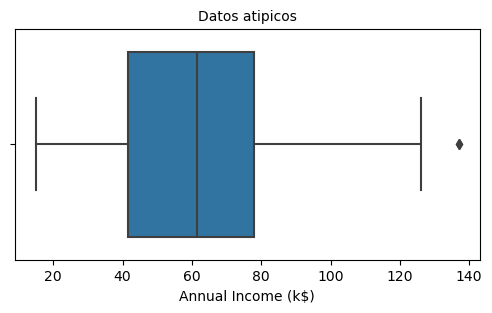

In [8]:
#datos atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=dataset['Annual Income (k$)'])
plt.title('Datos atipicos', fontsize=10 )

In [11]:
# Identificar datos faltantes
print("Cantidad de registros sin edad: ",dataset['Age'].isin([0]).sum())
print("Cantidad de registros sin ingreso anual: ",dataset['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de registros sin cupo crediticio: ",dataset['Spending Score (1-100)'].isin([0]).sum())

Cantidad de registros sin edad:  0
Cantidad de registros sin ingreso anual:  0
Cantidad de registros sin cupo crediticio:  0


In [13]:
# Reemplazar datos faltantes con valores promedio de cada variable
dataset['Age']=dataset['Age'].replace(0,dataset['Age'].mean())
dataset['Annual Income (k$)']=dataset['Annual Income (k$)'].replace(0,dataset['Annual Income (k$)'].mean())
dataset['Spending Score (1-100)']=dataset['Spending Score (1-100)'].replace(0,dataset['Spending Score (1-100)'].mean())

In [15]:
# conteo datos atipicos
lvl_min=0
lvl_max=100
atipico=((dataset['Annual Income (k$)']<lvl_min)|(dataset['Annual Income (k$)']>lvl_max)).sum()
print("El total de datos atipicos es: {}".format(atipico))

El total de datos atipicos es: 14


In [29]:
# filtro datos atipicos
datasetf=dataset[(dataset['Annual Income (k$)']<lvl_max)&(dataset['Annual Income (k$)']>lvl_min)]
print(datasetf)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
181         182  Female   32                  97                      86
182         183    Male   46                  98                      15
183         184  Female   29                  98                      88
184         185  Female   41                  99                      39
185         186    Male   30                  99                      97

[186 rows x 5 columns]


In [30]:
# datos faltantes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


###### Seleccion de caracteristicas para entrenar modelo
######  *Edad
######  *Ingresos anuales

In [32]:
# seleccionar variables del modelo
dataset = dataset[["Age","Annual Income (k$)"]]

In [33]:
dataset.head(10)

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
5,22,17
6,35,18
7,23,18
8,64,19
9,30,19


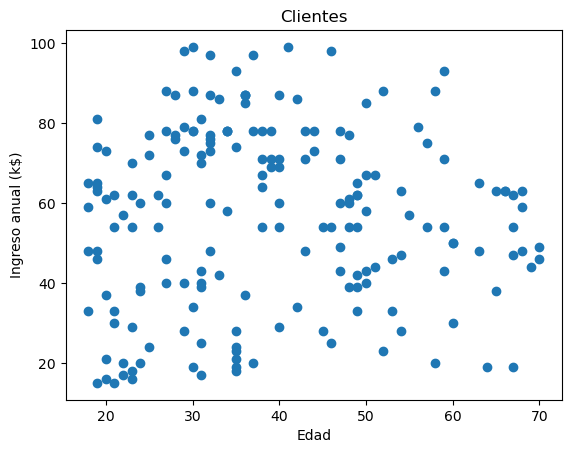

In [36]:
# graficar sin agrupamiento
plt.scatter(dataset['Age'], dataset['Annual Income (k$)'])
plt.xlabel('Edad')
plt.ylabel('Ingreso anual (k$)')
plt.title('Clientes')
plt.show()